Define constants

In [1]:
from os import getcwd, path
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()

# GLOVE_UTILS = path.join(BASE_PATH, 'glove_utils.py')
DATA_UTILS = path.join(BASE_PATH, 'data_utils.py')
CONV_MODEL = path.join(BASE_PATH, 'convnet/train.py')
MODEL_PATH = path.join(BASE_PATH, 'convnet/model/model.h5')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')

In [2]:
# exec(open(GLOVE_UTILS).read())
# print_top_similar('hello', count=10)
exec(open(DATA_UTILS).read())
exec(open(CONV_MODEL).read())

/home/2359media/miniconda3/envs/botbot-nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Use functions from the utils to extract and preprocess the training data

In [3]:
from keras.utils import to_categorical

X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    to_categorical(classes.index(item), num_classes=num_classes)
    for item in y_data
], dtype='float32')

Plot the training data

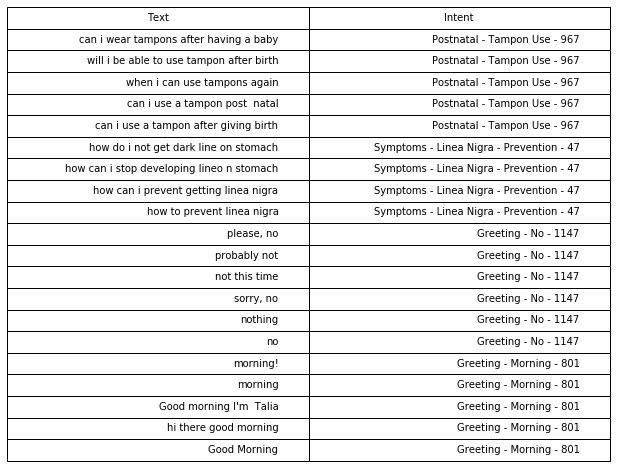

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(np.argmax(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Train starting from a previous model if exists or start the training from scratch
- Use `non_static=False` to avoid adding the non-static channel (performance boost, sacrifices accuracy)
- Use `use_tqdm=False` to use Keras original stdout instead

In [6]:
train_model(X_train, y_train, classes=classes, model_path=MODEL_PATH) # disable non-static channel for faster training

Importing /home/2359media/botbot-nlp/data/glove/glove.6B.300d.pickle...
Tokenizer contains 20989 unique tokens
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 46)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 64)           28416       input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 64)           0           lstm_1[0][0]                     
__________________________________________________________________________________________________
pos_attention_vec (Dense)       (None, 512)          33280       dropout_1[0][0]                 

HBox(children=(IntProgress(value=0, description='Training', max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=10256), HTML(value='')))


Epoch 00002: loss improved from inf to 6.16916, saving model to /home/2359media/botbot-nlp/convnet/model/weights-02-6.1692.h5


HBox(children=(IntProgress(value=0, description='Epoch 2', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=10256), HTML(value='')))


Epoch 00004: loss improved from 6.16916 to 2.30782, saving model to /home/2359media/botbot-nlp/convnet/model/weights-04-2.3078.h5


HBox(children=(IntProgress(value=0, description='Epoch 4', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=10256), HTML(value='')))


Epoch 00006: loss improved from 2.30782 to 1.01206, saving model to /home/2359media/botbot-nlp/convnet/model/weights-06-1.0121.h5


HBox(children=(IntProgress(value=0, description='Epoch 6', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=10256), HTML(value='')))


Epoch 00008: loss improved from 1.01206 to 0.61786, saving model to /home/2359media/botbot-nlp/convnet/model/weights-08-0.6179.h5


HBox(children=(IntProgress(value=0, description='Epoch 8', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=10256), HTML(value='')))


Epoch 00010: loss improved from 0.61786 to 0.48913, saving model to /home/2359media/botbot-nlp/convnet/model/weights-10-0.4891.h5


HBox(children=(IntProgress(value=0, description='Epoch 10', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=10256), HTML(value='')))


Epoch 00012: loss improved from 0.48913 to 0.42841, saving model to /home/2359media/botbot-nlp/convnet/model/weights-12-0.4284.h5


HBox(children=(IntProgress(value=0, description='Epoch 12', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=10256), HTML(value='')))


Epoch 00014: loss improved from 0.42841 to 0.39036, saving model to /home/2359media/botbot-nlp/convnet/model/weights-14-0.3904.h5


HBox(children=(IntProgress(value=0, description='Epoch 14', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=10256), HTML(value='')))


Epoch 00016: loss improved from 0.39036 to 0.37873, saving model to /home/2359media/botbot-nlp/convnet/model/weights-16-0.3787.h5


HBox(children=(IntProgress(value=0, description='Epoch 16', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=10256), HTML(value='')))


Epoch 00018: loss improved from 0.37873 to 0.35138, saving model to /home/2359media/botbot-nlp/convnet/model/weights-18-0.3514.h5


HBox(children=(IntProgress(value=0, description='Epoch 18', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=10256), HTML(value='')))


Epoch 00020: loss improved from 0.35138 to 0.34255, saving model to /home/2359media/botbot-nlp/convnet/model/weights-20-0.3425.h5


HBox(children=(IntProgress(value=0, description='Epoch 20', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=10256), HTML(value='')))


Epoch 00022: loss improved from 0.34255 to 0.33512, saving model to /home/2359media/botbot-nlp/convnet/model/weights-22-0.3351.h5


HBox(children=(IntProgress(value=0, description='Epoch 22', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=10256), HTML(value='')))


Epoch 00024: loss improved from 0.33512 to 0.31754, saving model to /home/2359media/botbot-nlp/convnet/model/weights-24-0.3175.h5


HBox(children=(IntProgress(value=0, description='Epoch 24', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=10256), HTML(value='')))


Epoch 00026: loss improved from 0.31754 to 0.31026, saving model to /home/2359media/botbot-nlp/convnet/model/weights-26-0.3103.h5


HBox(children=(IntProgress(value=0, description='Epoch 26', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=10256), HTML(value='')))


Epoch 00028: loss improved from 0.31026 to 0.30844, saving model to /home/2359media/botbot-nlp/convnet/model/weights-28-0.3084.h5


HBox(children=(IntProgress(value=0, description='Epoch 28', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=10256), HTML(value='')))


Epoch 00030: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 30', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=10256), HTML(value='')))


Epoch 00032: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 32', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=10256), HTML(value='')))


Epoch 00034: loss improved from 0.30844 to 0.29903, saving model to /home/2359media/botbot-nlp/convnet/model/weights-34-0.2990.h5


HBox(children=(IntProgress(value=0, description='Epoch 34', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=10256), HTML(value='')))


Epoch 00036: loss improved from 0.29903 to 0.28489, saving model to /home/2359media/botbot-nlp/convnet/model/weights-36-0.2849.h5


HBox(children=(IntProgress(value=0, description='Epoch 36', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=10256), HTML(value='')))


Epoch 00038: loss improved from 0.28489 to 0.27198, saving model to /home/2359media/botbot-nlp/convnet/model/weights-38-0.2720.h5


HBox(children=(IntProgress(value=0, description='Epoch 38', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=10256), HTML(value='')))


Epoch 00040: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 40', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=10256), HTML(value='')))


Epoch 00042: loss improved from 0.27198 to 0.26457, saving model to /home/2359media/botbot-nlp/convnet/model/weights-42-0.2646.h5


HBox(children=(IntProgress(value=0, description='Epoch 42', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=10256), HTML(value='')))


Epoch 00044: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 44', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=10256), HTML(value='')))


Epoch 00046: loss improved from 0.26457 to 0.25860, saving model to /home/2359media/botbot-nlp/convnet/model/weights-46-0.2586.h5


HBox(children=(IntProgress(value=0, description='Epoch 46', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=10256), HTML(value='')))


Epoch 00048: loss improved from 0.25860 to 0.25380, saving model to /home/2359media/botbot-nlp/convnet/model/weights-48-0.2538.h5


HBox(children=(IntProgress(value=0, description='Epoch 48', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=10256), HTML(value='')))


Epoch 00050: loss improved from 0.25380 to 0.24949, saving model to /home/2359media/botbot-nlp/convnet/model/weights-50-0.2495.h5


HBox(children=(IntProgress(value=0, description='Epoch 50', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=10256), HTML(value='')))


Epoch 00052: loss improved from 0.24949 to 0.24363, saving model to /home/2359media/botbot-nlp/convnet/model/weights-52-0.2436.h5


HBox(children=(IntProgress(value=0, description='Epoch 52', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=10256), HTML(value='')))


Epoch 00054: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 54', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 55', max=10256), HTML(value='')))


Epoch 00056: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 56', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=10256), HTML(value='')))


Epoch 00058: loss improved from 0.24363 to 0.24129, saving model to /home/2359media/botbot-nlp/convnet/model/weights-58-0.2413.h5


HBox(children=(IntProgress(value=0, description='Epoch 58', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=10256), HTML(value='')))


Epoch 00060: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 60', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 61', max=10256), HTML(value='')))


Epoch 00062: loss improved from 0.24129 to 0.22923, saving model to /home/2359media/botbot-nlp/convnet/model/weights-62-0.2292.h5


HBox(children=(IntProgress(value=0, description='Epoch 62', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 63', max=10256), HTML(value='')))


Epoch 00064: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 64', max=10256), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 65', max=10256), HTML(value='')))


Epoch 00066: loss did not improve


HBox(children=(IntProgress(value=0, description='Epoch 66', max=10256), HTML(value='')))

Epoch 00067: early stopping

